In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dt
import pickle

import sklearn.preprocessing as pp
from mpl_toolkits.mplot3d import Axes3D

from sklearn.svm import LinearSVC


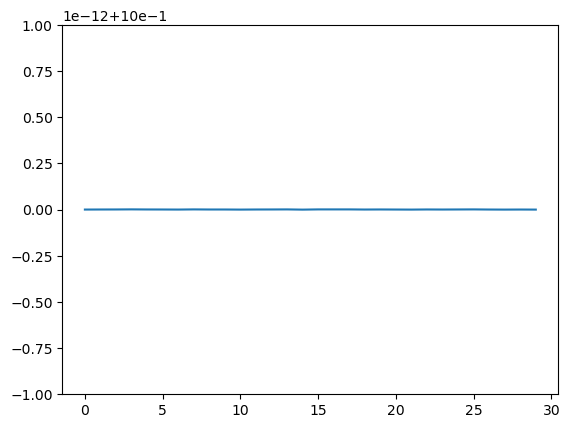

In [39]:
D = dt.load_breast_cancer()

X = D['data']
y = D['target']

# Média
m = np.mean(X, axis=0)

# Desvio padrão
s = np.std(X, axis=0)

# Retirar a média aos dados
X = X-m # não é preciso fazer newaxis porque os dados do sklear vêm amostras x dimensões

# Transformar o dados de forma a que variância fique igual a 1
Xs = np.dot(np.diag(1/s), X.T).T

plt.plot(np.std(Xs, axis=0))

In [40]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X)
Xs = sc.transform(X)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Dividi os dados para conseguir avaliar o classificador antes do pré-processamente e após o pré-processamento
X1, X2, y1, y2 = train_test_split(X, y, test_size=0.5, stratify=y) # Com o stratify=y deixa a porporção das classes


svm = LinearSVC(max_iter=150000).fit(X1, y1)
y2e1 = svm.predict(X2)


sc = StandardScaler().fit(X1)
X1s = sc.transform(X1)
X2s = sc.transform(X2)

svm = LinearSVC(max_iter=150000).fit(X1s, y1)
y2e2 = svm.predict(X2s)

print("Matriz de confusão sem dados pré-processados: \n", confusion_matrix(y2, y2e1))
print("Matriz de confusão com dados pré-processados: \n", confusion_matrix(y2, y2e2))




Matriz de confusão sem dados pré-processados: 
 [[ 96  10]
 [  7 172]]
Matriz de confusão com dados pré-processados: 
 [[102   4]
 [  5 174]]


c:\Users\anaso\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [36]:
D = dt.load_digits()

X = D.data
y = D.target

X1, X2, y1, y2 = train_test_split(X, y, test_size=0.5, stratify=y)

# Sem pré-processamento
svm = LinearSVC(max_iter=10000).fit(X1, y1)
y2e1 = svm.predict(X2)

# Com pré-processamento
sc = StandardScaler().fit(X1)
X1n = sc.transform(X1)
X2n = sc.transform(X2)

svm = LinearSVC(max_iter=10000).fit(X1n, y1)
y2e2 = svm.predict(X2n)

print("Matriz de confusão sem dados pré-processados: \n", confusion_matrix(y2, y2e1))
print("Matriz de confusão com dados pré-processados: \n", confusion_matrix(y2, y2e2))

c:\Users\anaso\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Matriz de confusão sem dados pré-processados: 
 [[86  1  0  0  1  0  1  0  0  0]
 [ 1 83  0  3  0  0  1  0  3  0]
 [ 0  0 85  1  0  0  0  0  0  2]
 [ 0  0  1 83  0  1  1  1  3  2]
 [ 0  2  0  0 88  0  0  0  0  1]
 [ 0  5  0  2  0 80  1  0  1  2]
 [ 1  0  0  0  0  1 89  0  0  0]
 [ 0  0  0  1  0  0  0 86  0  2]
 [ 3  5  1  1  1  0  0  1 73  2]
 [ 2  2  0  0  1  0  0  4  2 79]]
Matriz de confusão com dados pré-processados: 
 [[87  0  0  0  1  0  1  0  0  0]
 [ 0 83  0  3  0  0  0  0  4  1]
 [ 0  0 88  0  0  0  0  0  0  0]
 [ 0  0  1 84  0  1  0  1  4  1]
 [ 0  1  0  0 89  0  0  0  1  0]
 [ 1  3  0  2  0 84  1  0  0  0]
 [ 1  0  0  0  2  0 88  0  0  0]
 [ 1  0  0  0  0  0  0 87  0  1]
 [ 2  6  0  2  1  1  0  0 73  2]
 [ 0  0  0  1  0  2  0  2  2 83]]


dict_keys(['foldTrain', 'trueClass', 'foldTest', 'X'])


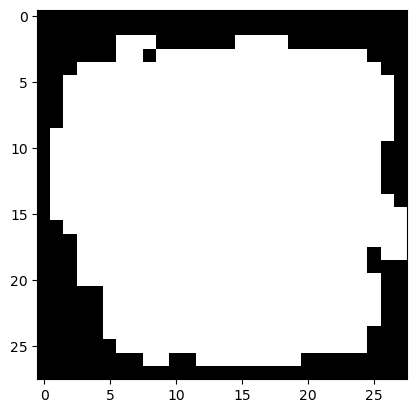

In [50]:
## Com dados MNIST
fN = '/Users/anaso/Documents/AA/AA-22-23/Laboratorios/Lab3/Material fornecido/MNISTsmall.p'
D = pickle.load(open(fN, 'rb'))

print(D.keys())

X = D['X']
y = D['trueClass']
foldTreino = D['foldTrain']
foldTeste = D['foldTest']

C4 = np.cov(X[:, y==4])

plt.imshow(C4)

v = np.diag(C4)

plt.imshow((v==0).reshape(28,28), cmap='binary')



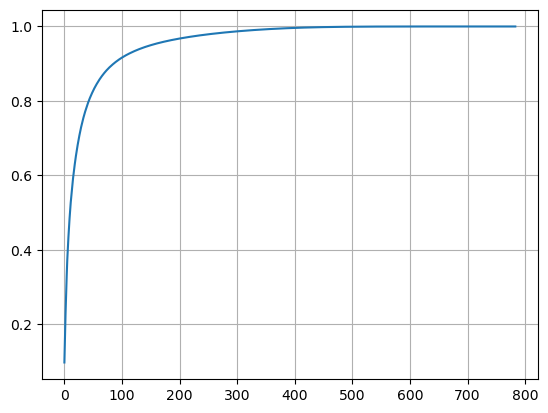

In [62]:
## Se não sabemos quais a dimensões a mandar fora usamos PCA (AND vs OR dos exemplos dos slides)
# Vetores próprios indicam quais os componentes principais a considerar
# Valor próprio elevado indica que varia muito, e vice-versa

import scipy.linalg as la

# covariancia dos dados de treino
Cx = np.cov(X)

v, W = la.eig(Cx) # v - valor próprio | W - Vetor próprio

# Eliminar parte imaginária
v = v.real
#plt.figure()
#plt.plot(v, '.')

#plt.figure()
#plt.plot(np.log(v), '.')

idx = np.argsort(-v)
#plt.figure()
#plt.plot(np.log(v[idx]), '.')


vs = v[idx]

# Quantas dimensões podemos eliminar? 
#print(np.sum(v<=0))

# Eliminar números complexos
W = W.real
W = W[:, idx]


# Vou transformar os dados pelas componentes principais
Xp = np.dot(W.T, X)
Cy = np.cov(Xp)

Cy[:3, :3] # Ver primeiras 3 linhas e 3 colunas da matriz para comprovar que dados transformados em Xp ficaram com matriz de covariância com matriz diagonal e zeros fora da diagonal

vn = vs/np.sum(vs)

cn = np.cumsum(vn)

#plt.plot(cn)
#plt.grid(True)

# Vejo quais destes valores estão abaixo de um th definido (neste caso 99%)
np.sum(cn<=0.99)

W2 = W[:, :np.sum(cn<=0.99)] # Escolher Vetores próprios responsáveis por 99% dos dados
#W2 = W[:, 0:150] # Escolher os primeiros 150 Vetores próprios





In [63]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99, whiten=True).fit(X1.T)
X1p = pca.transform(X1.T).T

X1p.shape


(2, 30)